In [2]:
# Import required libraries.
import numpy as np
import pandas as pd
# for plots
import matplotlib.pyplot as plt
import seaborn as sns
# for statistical analysis
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr, ttest_ind

from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('marketing_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# **Basic feature explorations**

In [5]:
# Let's check basic information about the dataset like number of rows, datatypes and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.shape

(2240, 28)

**By looking at dataset we can see that**
- column `Income` has extra spaces in name.
- column `Dt_Customer` seems to be data but showing as object.
- Income has `$` sign in it and it is not of type float.
Let's fix these first.

In [7]:
# Remove leading and trailing spaces from all column names
print(f"Before fix column names: \n {df.columns}")
df.columns = df.columns.str.strip()
print(f" \n After fix column names: \n {df.columns}")

Before fix column names: 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')
 
 After fix column names: 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'

In [8]:
print(df['Income'].str.contains('[^0-9.]').sum())  # Check for non-numeric characters

2216


### Income columns has `$` sign, Remove that and convert to float

In [9]:
# Remove the dollar sign and commas, then convert to float
df['Income'] = df['Income'].str.replace('[$,]', '', regex=True).astype(float)
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA


### Convert the Date column to datetime format

In [10]:
# Dt_Customer is object type, convert it to date time.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA


### Check for Null values

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
# Income column has null values
df['Income'].isnull().sum()

24

In [13]:
# find all rows of no income.
df[df['Income'].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA


Let's analyse the Dt_Customer, Marital_Status and Education and see their count

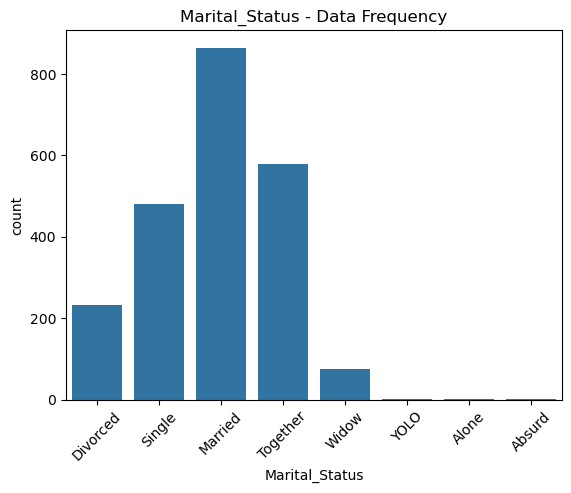

Number of samples According to Marital_Status 
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [14]:
# Number of samples according to Marital_Status
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 45)
plt.title("Marital_Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital_Status \n{df['Marital_Status'].value_counts()}")

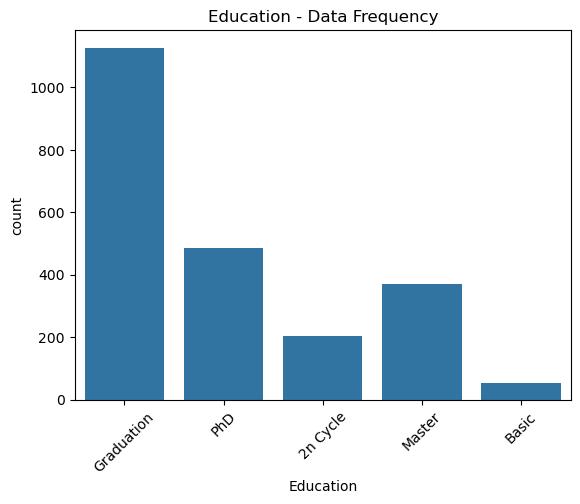

Number of samples According to Education 
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [15]:
# Number of samples according to Education
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 45)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

### As we can see above. 
  1. For Marital_Status column there values like `YOLO, Absurd,Alone` which can clubbed together as `Single`.
  2. For Education `Master` and `2 Cycle` both are the master level programs and hence can be clubbed.

In [16]:
# First, clean Education/Marital_Status categories
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master').str.title()
# replace values to single for easy understanding
df['Marital_Status']=df['Marital_Status'].replace({'Absurd':'Single', 'YOLO':'Single','Alone':'Single'}) 

print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'Phd' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow']


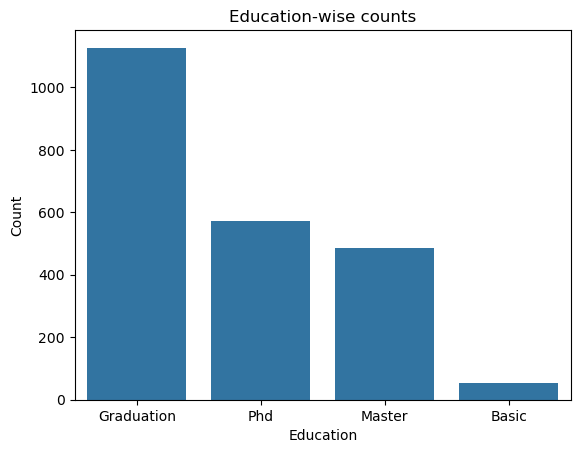

In [17]:
# Let's see the sample Education wise
sns.barplot(x=df["Education"].unique(), y=df["Education"].value_counts().values)
plt.title(f"Education-wise counts")
plt.xlabel('Education')
plt.ylabel("Count")
plt.show()

In [18]:
# pivot table for see Marital_Status according to education
df1 = df[["Education", 'Marital_Status']].value_counts().groupby(["Education", "Marital_Status"]).sum().reset_index().sort_values(by=['Education','Marital_Status'], ascending=False)
df1 = df1.pivot(index='Education', columns='Marital_Status', values='count')
df1

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
Basic,1,20,18,14,1
Graduation,119,433,254,286,35
Master,60,219,114,163,17
Phd,52,192,101,117,24


<Axes: xlabel='Education', ylabel='count'>

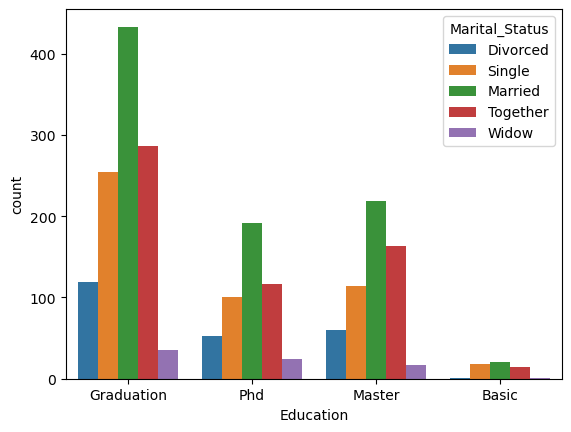

In [19]:
# Draw count plot 
sns.countplot(df, x='Education', hue='Marital_Status', stat='count')

In [20]:
# Group-based imputation
median_income = df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')
df['Income'] = df['Income'].fillna(median_income)

In [21]:
# Create variables to represent the total number of children, age, and total spending
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2025 - df['Year_Birth']  # 
df['Total_Spending'] = df.filter(like='Mnt').sum(axis=1)
#Derive the total purchases from the number of transactions across the three channels
df['Total_Purchases'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,55,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,64,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,67,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,58,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,36,91,6


 ### 4. Outlier Detection & Treatment

Text(0.5, 1.0, 'Outlier Detection')

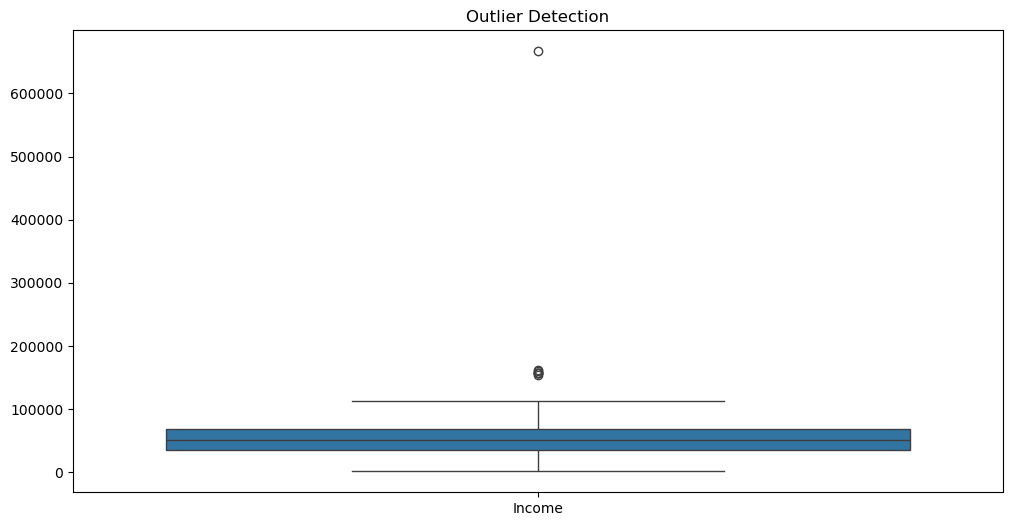

In [22]:
# Box plot to find outliers in Income, Age, Total Spending
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Income']])
plt.title('Outlier Detection')

Text(0.5, 1.0, 'Outlier Detection')

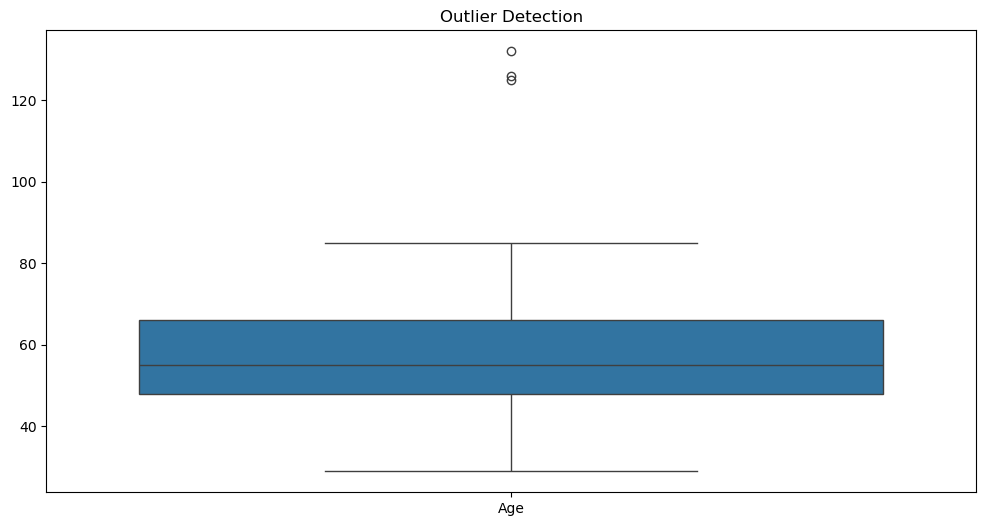

In [23]:
# Outliers in Age, Some ages are more than 120 years, which seems un-realistic  
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age']])
plt.title('Outlier Detection')

Text(0.5, 1.0, 'Outlier Detection')

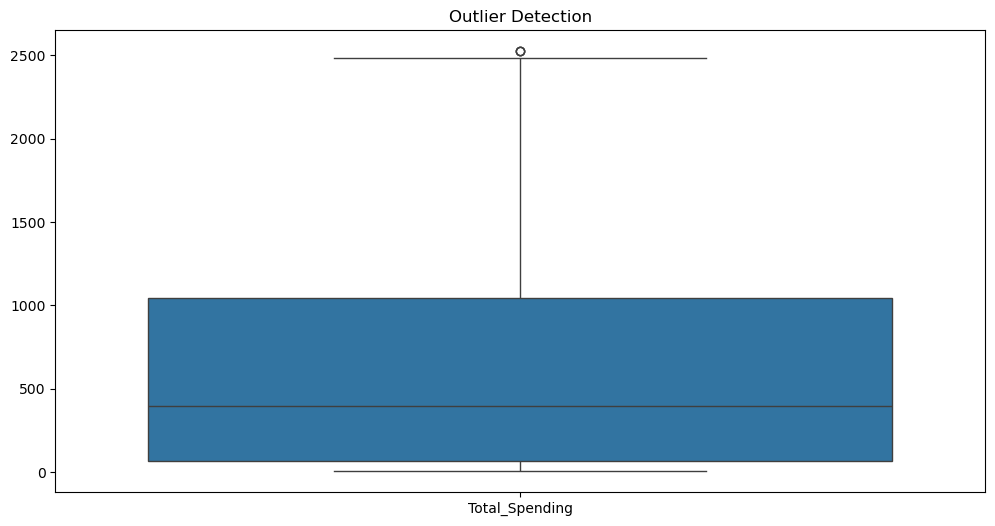

In [24]:
# Outliers if any for Total Spending
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Total_Spending']])
plt.title('Outlier Detection')

In [25]:
# Winsorization for extreme values, fix outliers for Income
from scipy.stats.mstats import winsorize
for col in ['Income', 'Age', 'Total_Spending']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

Text(0.5, 1.0, 'Outlier Detection')

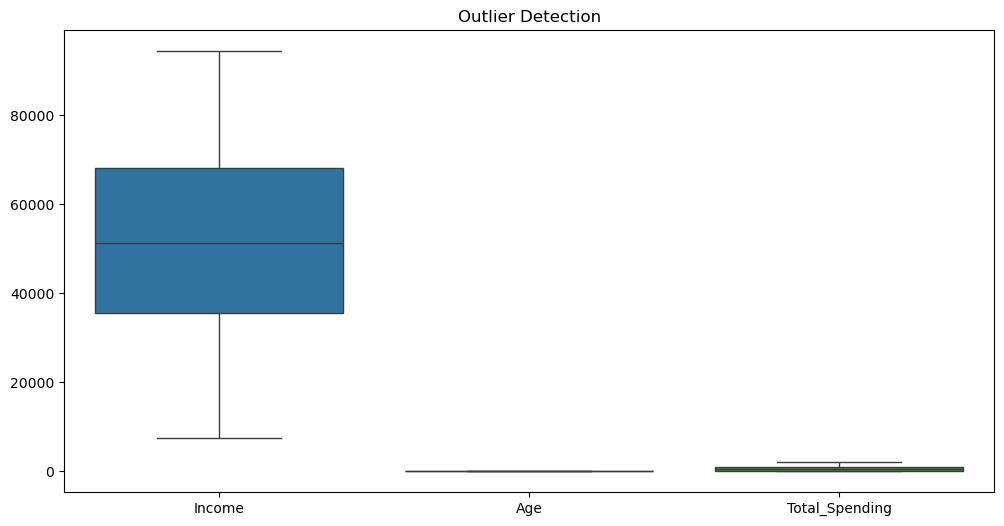

In [26]:
# Check boxplot after fxing them 
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Income', 'Age', 'Total_Spending']])
plt.title('Outlier Detection')

Text(0.5, 1.0, 'Outlier Detection')

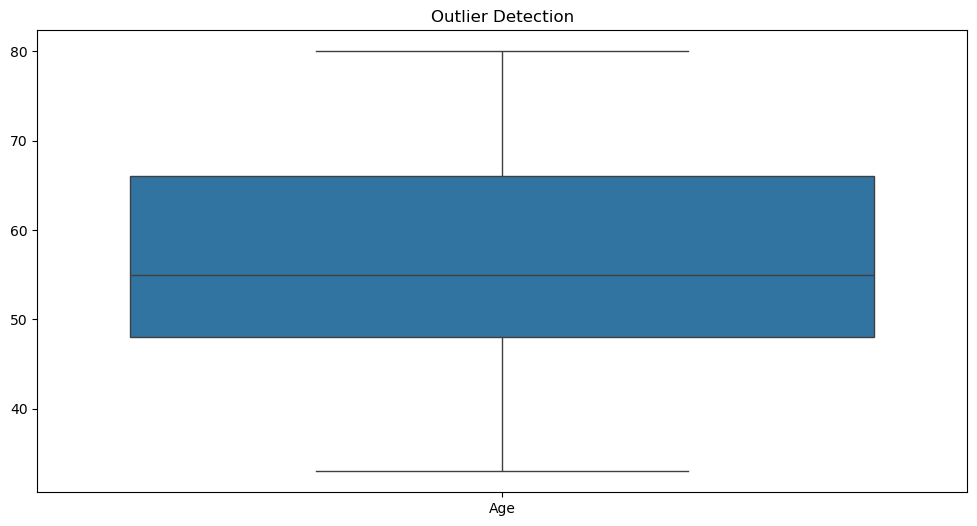

In [27]:
# Check boxplot after fxing them 
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age']])
plt.title('Outlier Detection')

Text(0.5, 1.0, 'Outlier Detection')

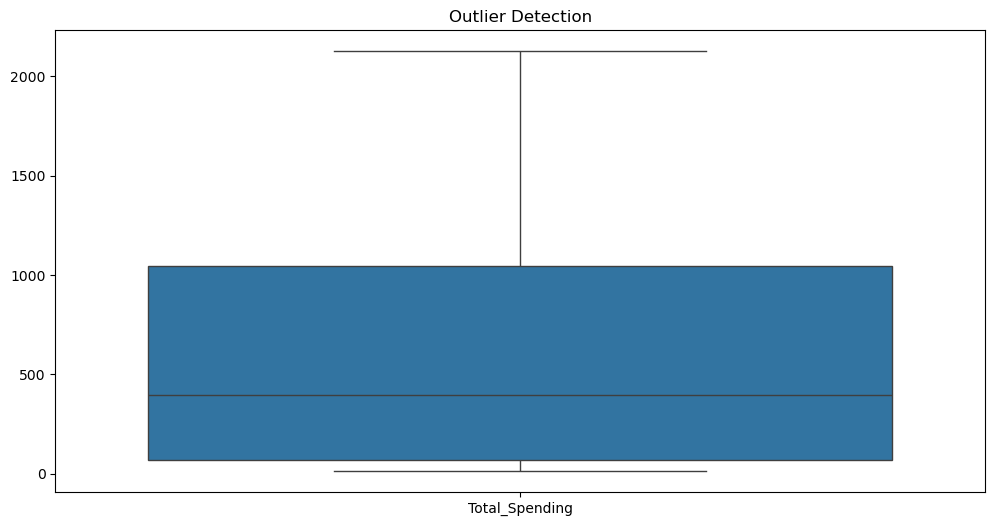

In [28]:
# Check boxplot after fxing them 
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Total_Spending']])
plt.title('Outlier Detection')

### 5. Encoding Categorical Variables

In [29]:
df2 = df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'], axis=1)
df2.head(3)

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,189,...,4,4,6,1,1,SP,0,55,1190,14
1,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,0,...,7,3,7,5,1,CA,0,64,577,17
2,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,2,...,3,2,5,2,0,US,1,67,251,10


In [30]:
# Ordinal encoding for Education
education_order = ['Basic', 'Graduation', 'Master', 'PhD']
encoder = OrdinalEncoder(categories=[df['Education'].unique().tolist()])
df['Education_Code'] = encoder.fit_transform(df[['Education']])


# One-hot encoding
df = pd.get_dummies(df,columns=['Marital_Status'],dtype='int64')
df.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Total_Children,Age,Total_Spending,Total_Purchases,Education_Code,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,0,55,1190,14,0.0,1,0,0,0,0
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,0,64,577,17,0.0,0,0,1,0,0
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,1,67,251,10,0.0,0,1,0,0,0
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,...,2,58,13,3,0.0,0,0,0,1,0
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,...,1,36,91,6,0.0,0,0,1,0,0


In [31]:
df[['Education_Code', 'Education']].value_counts()

Education_Code  Education 
0.0             Graduation    1127
2.0             Master         573
1.0             Phd            486
3.0             Basic           54
Name: count, dtype: int64

Text(0.5, 1.0, 'Variable Correlation Heatmap')

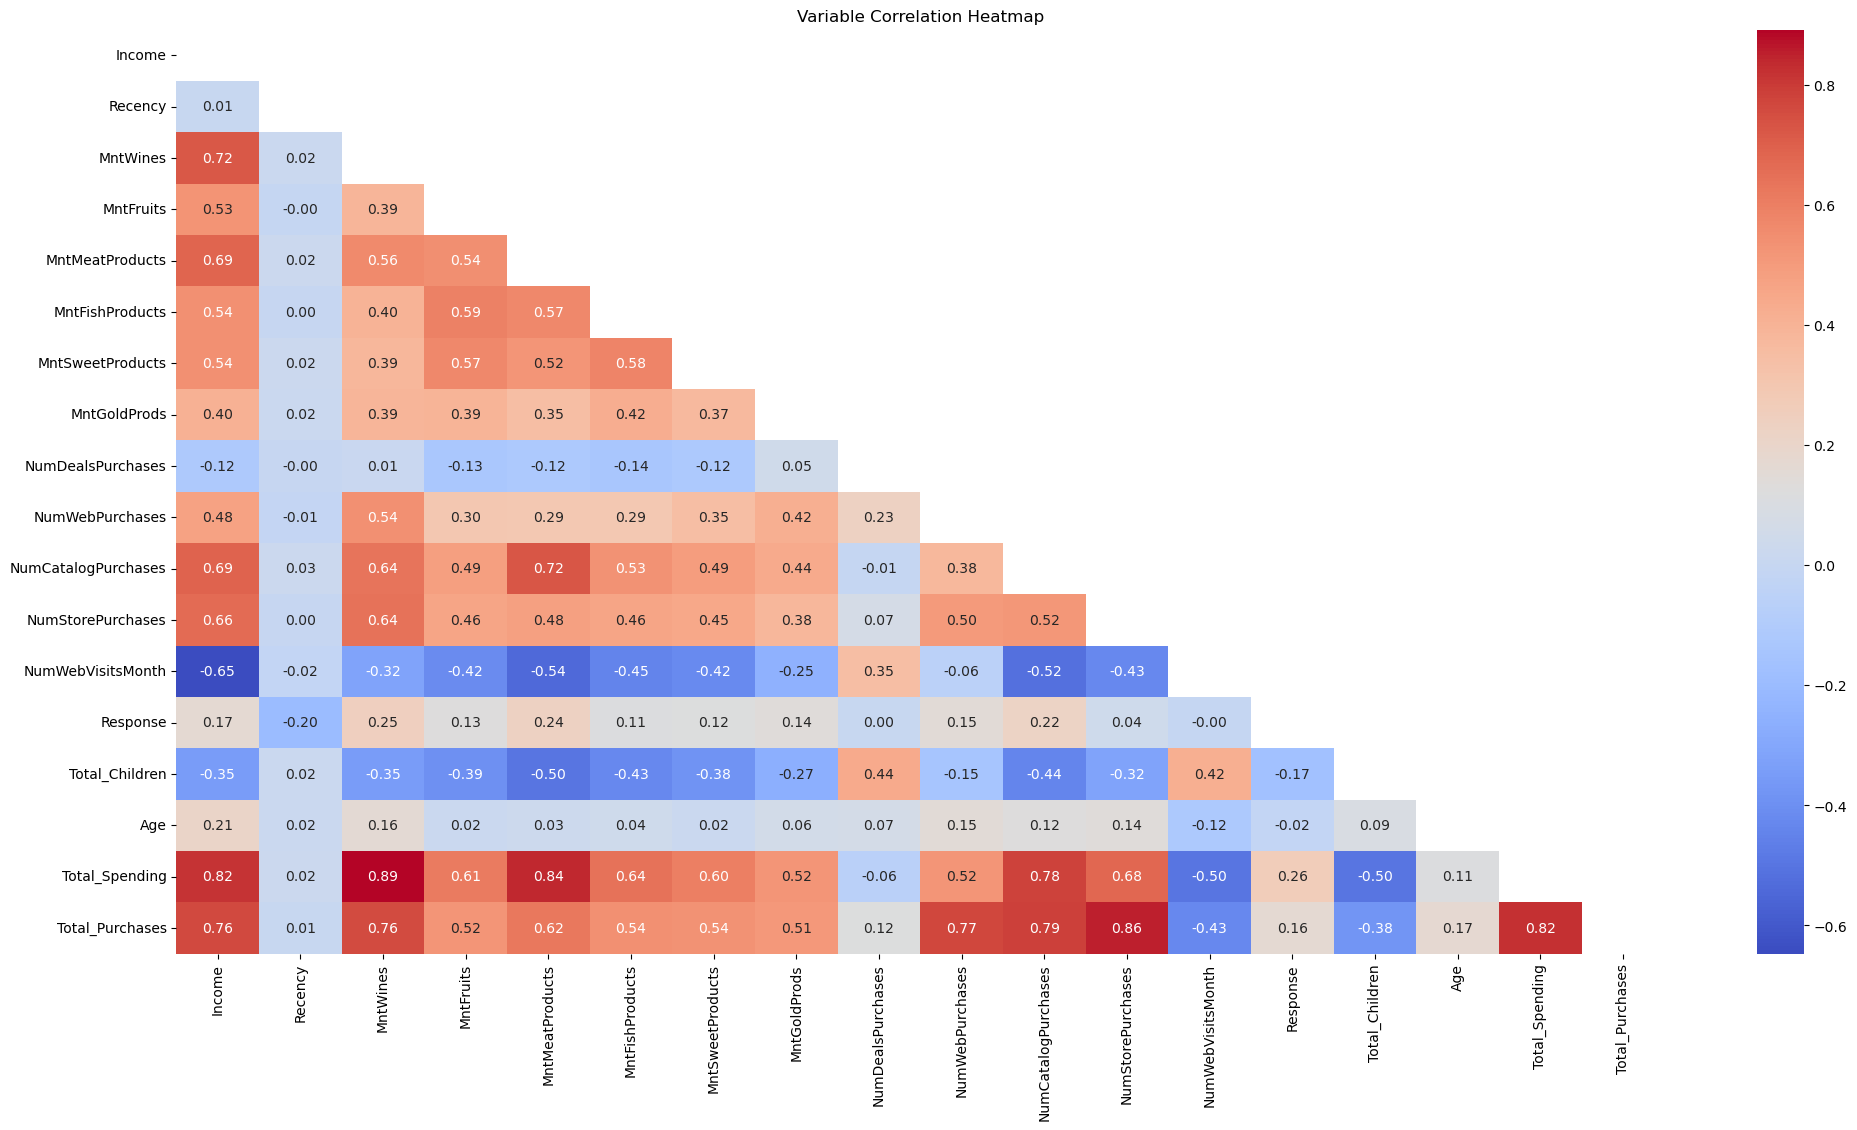

In [32]:
plt.figure(figsize=(24,12))
# Calculate the correlation matrix
corr_matrix = df2.corr(numeric_only=True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Variable Correlation Heatmap')


<Figure size 1600x1000 with 0 Axes>

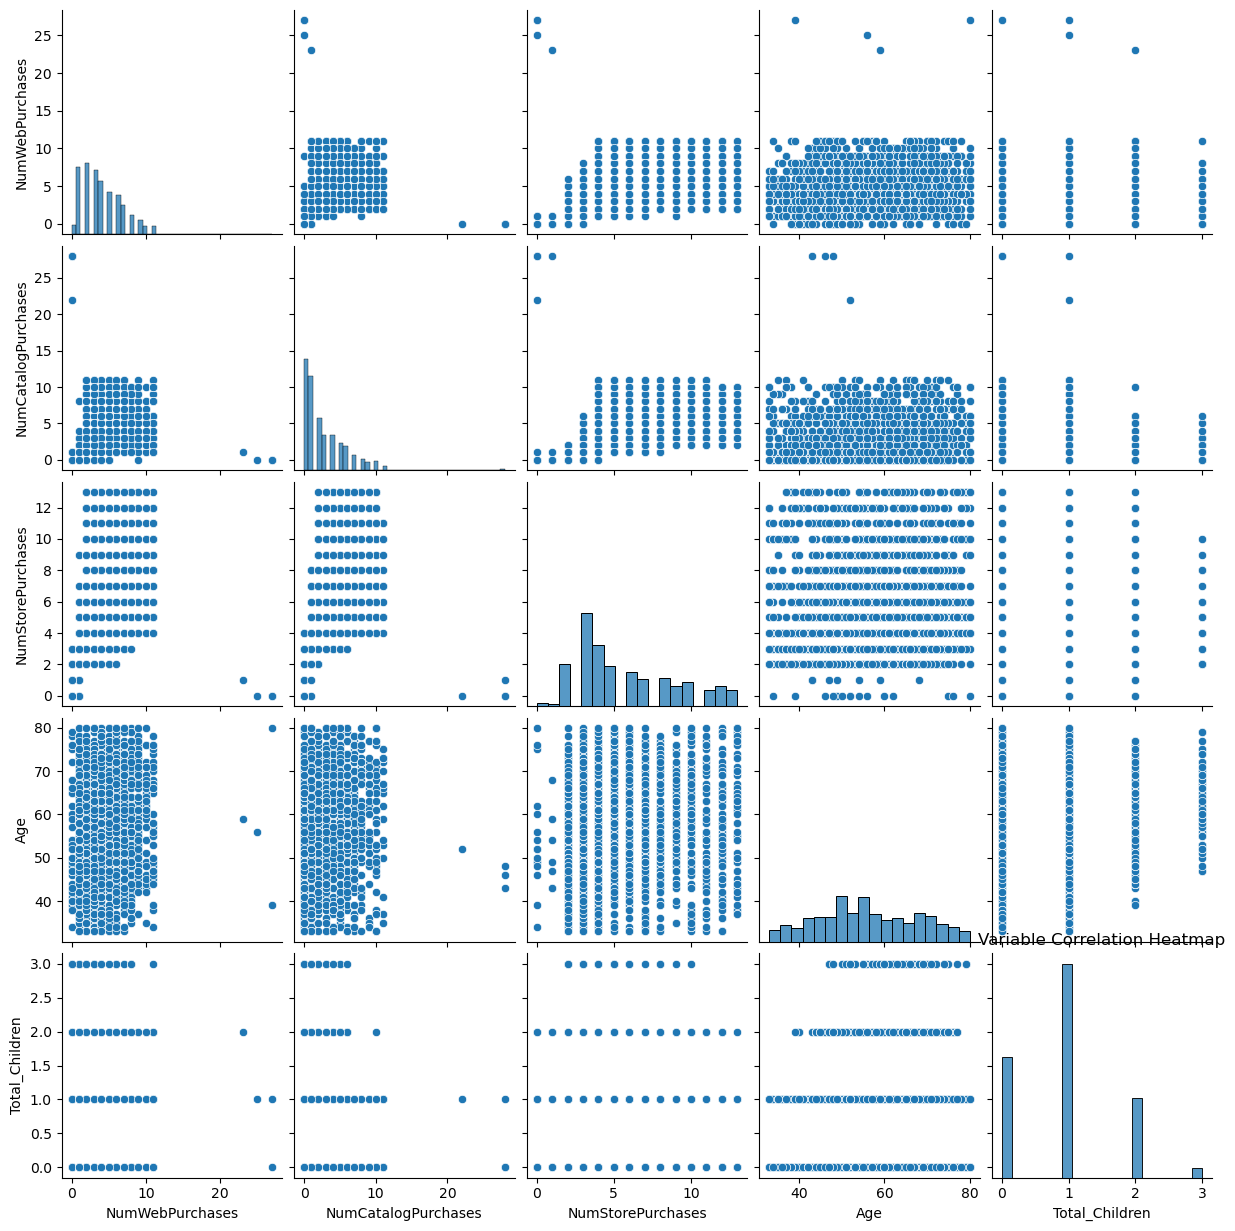

In [33]:
plt.figure(figsize=(16,10))
sns.pairplot(df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'Age', 'Total_Children']])
plt.title('Variable Correlation Heatmap')
plt.show()

### 7. Hypothesis Testing

## A. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

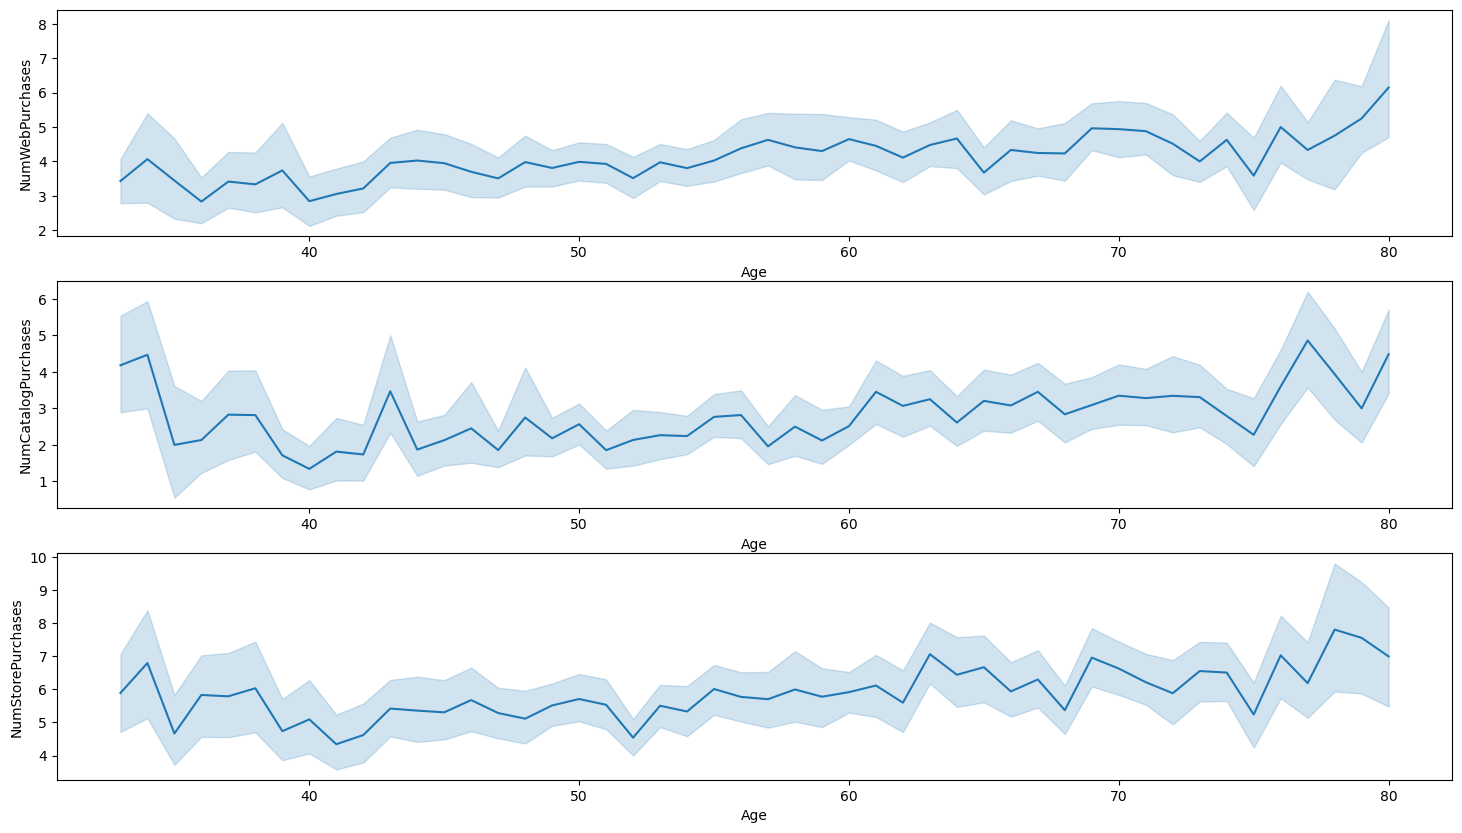

In [34]:
# Age vs purchase channel.  
fig, axes = plt.subplots(3, 1, figsize=(18, 10))
sns.lineplot(ax=axes[0], data=df, x='Age', y='NumWebPurchases')
sns.lineplot(ax=axes[1], data=df, x='Age', y='NumCatalogPurchases')
sns.lineplot(ax=axes[2], data=df, x='Age', y='NumStorePurchases')
plt.show(fig)

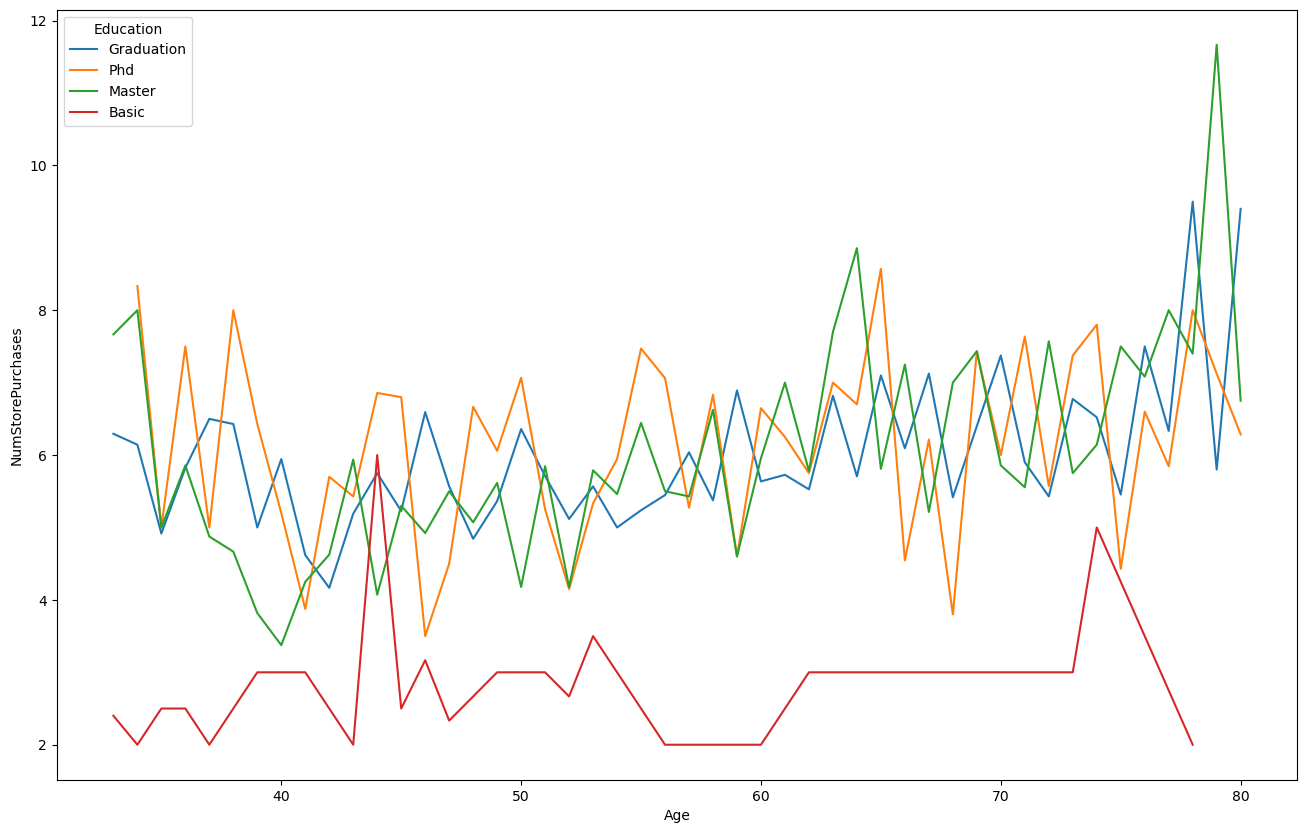

In [35]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x='Age', y='NumStorePurchases', hue='Education', errorbar=None)
plt.show()

In [36]:

age_data= df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'Age']]
age_data.loc[age_data['Age']<40, 'age_group'] = 'Young'
age_data.loc[age_data['Age'].between(40,60), 'age_group'] = 'Middle Age'
age_data.loc[age_data['Age']>60, 'age_group'] = 'Elderly'

/var/folders/0l/hczntt_958j8g2jc40wf4zm40000gn/T/ipykernel_7366/2365935797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data.loc[age_data['Age']<40, 'age_group'] = 'Young'


In [37]:
age_data[['age_group', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby(['age_group']).sum()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
age_group,,,
Elderly,3540,2554,5021
Middle Age,4960,2895,6893
Young,650,514,1056


### As we can see from above analysis. clearly that Elder people purchasing more from in store then the anyother channel.

In [38]:
from scipy.stats import pearsonr
corr, p = pearsonr(df['Age'], df['NumStorePurchases'])
print(f"Correlation: {corr:.2f}, p-value: {p:.9f}")

Correlation: 0.14, p-value: 0.000000000


- A correlation of 0.14 suggests a weak positive relationship between age and store purchases. As age increases, the number of store purchases tends to increase slightly, but the relationship is not very strong.
- The p-value is extremely small (essentially zero). This means that the observed correlation is statistically significant (much smaller than a typical threshold of 0.05).
- Despite the weak correlation, the p-value indicates that the relationship between age and store purchases is unlikely to be due to random chance.

## B. Customers with children likely experience time constraints, making online shopping a more convenient option.

In [39]:
# Let's the relation with the customer with children and purchase channeled preferred
child_df = df[['Total_Children', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby(['Total_Children']).sum()
child_df

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Total_Children,,,
0,2803,3036,4635
1,4834,2407,6310
2,1361,464,1815
3,152,56,210


<Axes: xlabel='Total_Children', ylabel='Total_Purchases'>

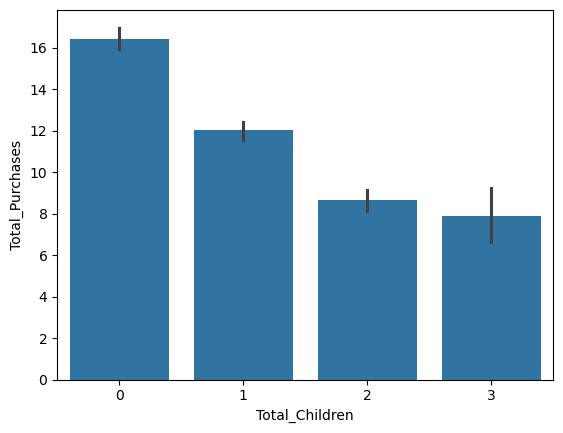

In [40]:
# Let's see the total purchase by customer having children
sns.barplot(data=df, x='Total_Children', y='Total_Purchases')

<Axes: xlabel='Total_Children'>

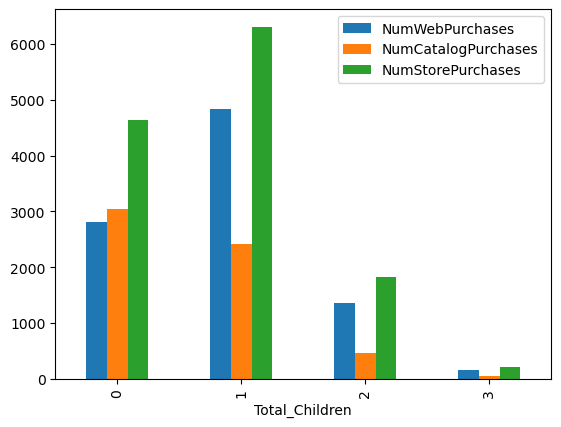

In [41]:
child_df.plot.bar()

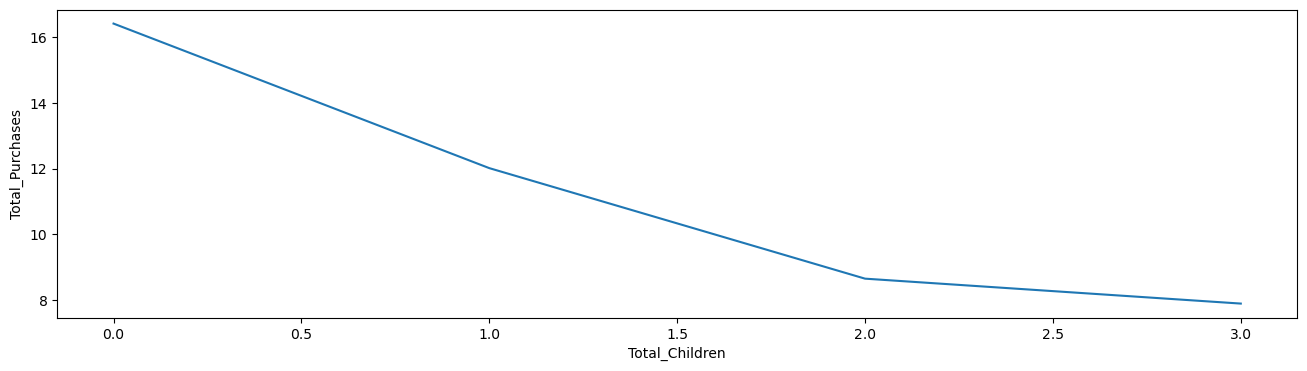

In [42]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x='Total_Children', y='Total_Purchases', errorbar=None)
plt.show()

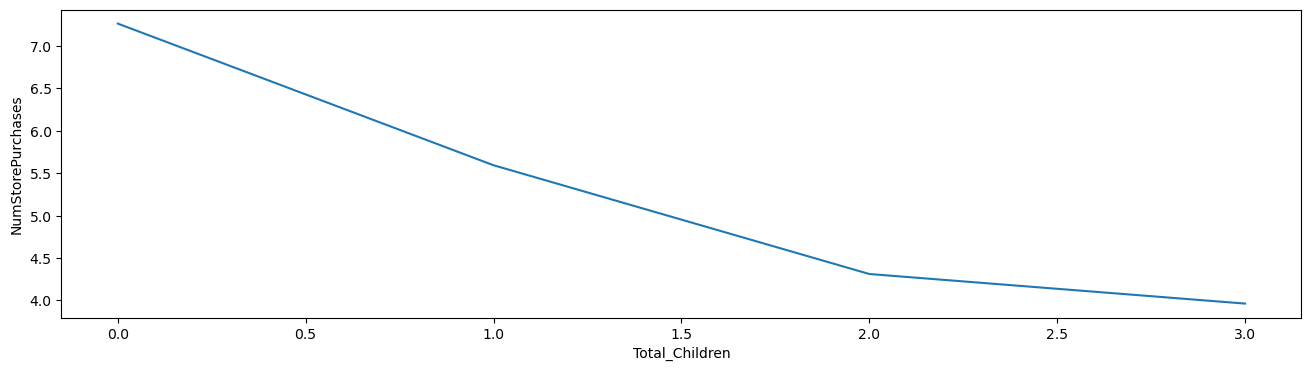

In [43]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x='Total_Children', y='NumStorePurchases', errorbar=None)
plt.show()

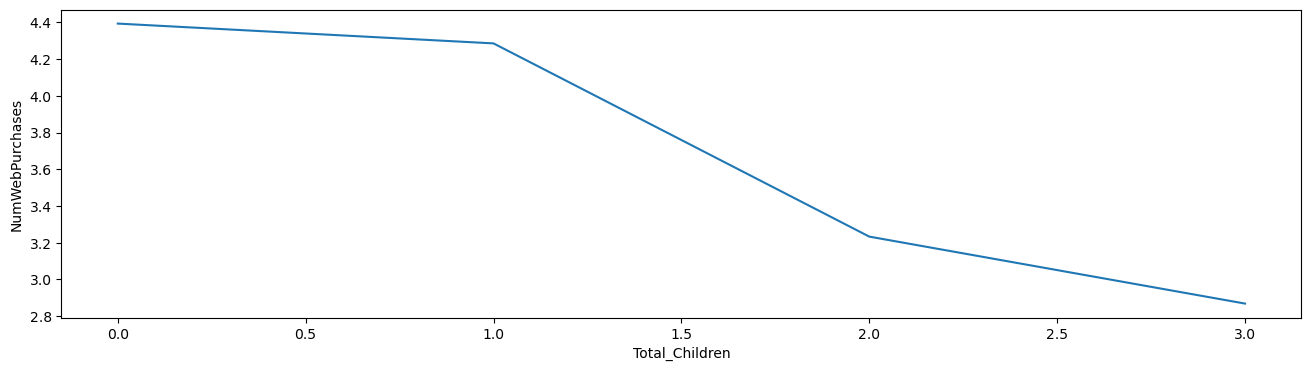

In [44]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x='Total_Children', y='NumWebPurchases', errorbar=None)
plt.show()

### Cutomer with children more than 2 are doing less shopping.  We can see that purchasing graph signaficantly dropped for children more then 2.

In [45]:
# Let's group the by customers with and without children to see the purchasing pattern

df['Has_Children'] = df['Total_Children'].apply(lambda x: 'No Children' if x == 0 else 'With Children')

# Group by the new column 'Has_Children' and sum the other columns
result = df.groupby('Has_Children')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
result


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Has_Children,,,
No Children,2803,3036,4635
With Children,6347,2927,8335


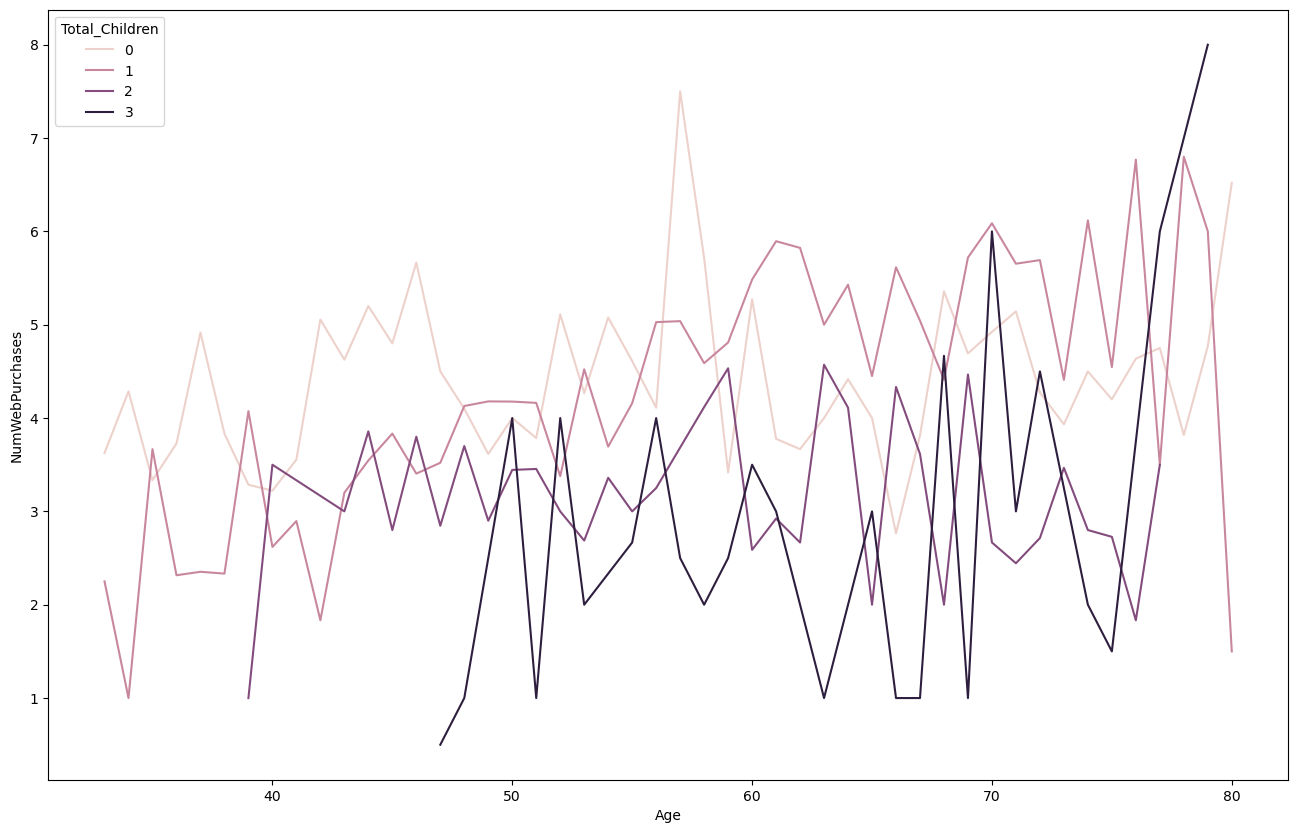

In [46]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x='Age', y='NumWebPurchases', hue='Total_Children', errorbar=None)
plt.show()

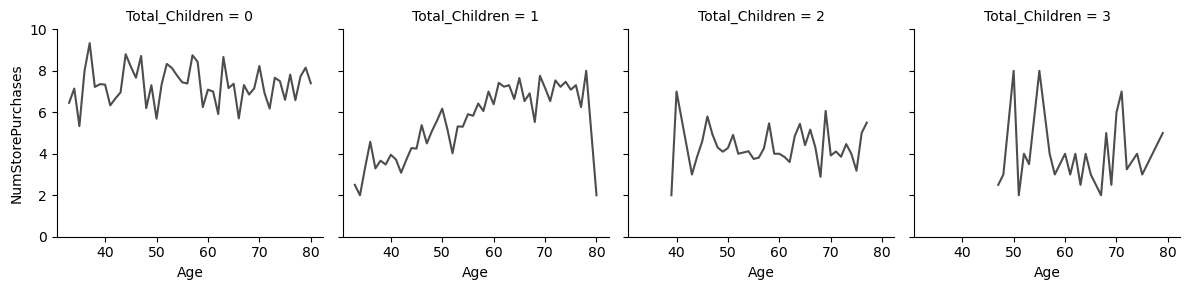

In [47]:
# Number of web purchases as Age increases along with the no. of children
g = sns.FacetGrid(df, col="Total_Children", col_wrap=4, ylim=(0, 10))
g.map(sns.lineplot, "Age", "NumStorePurchases",color=".3", errorbar=None)

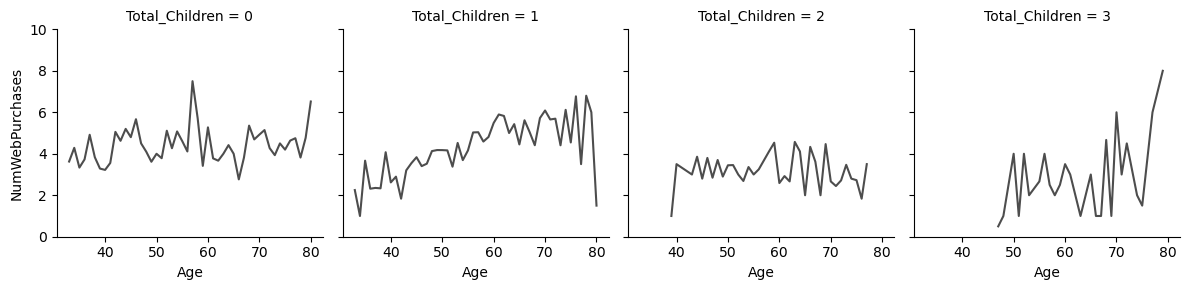

In [48]:
# Number of web purchases as Age increases along with the no. of children
g = sns.FacetGrid(df, col="Total_Children", col_wrap=4, ylim=(0, 10))
g.map(sns.lineplot, "Age", "NumWebPurchases",color=".3", errorbar=None)

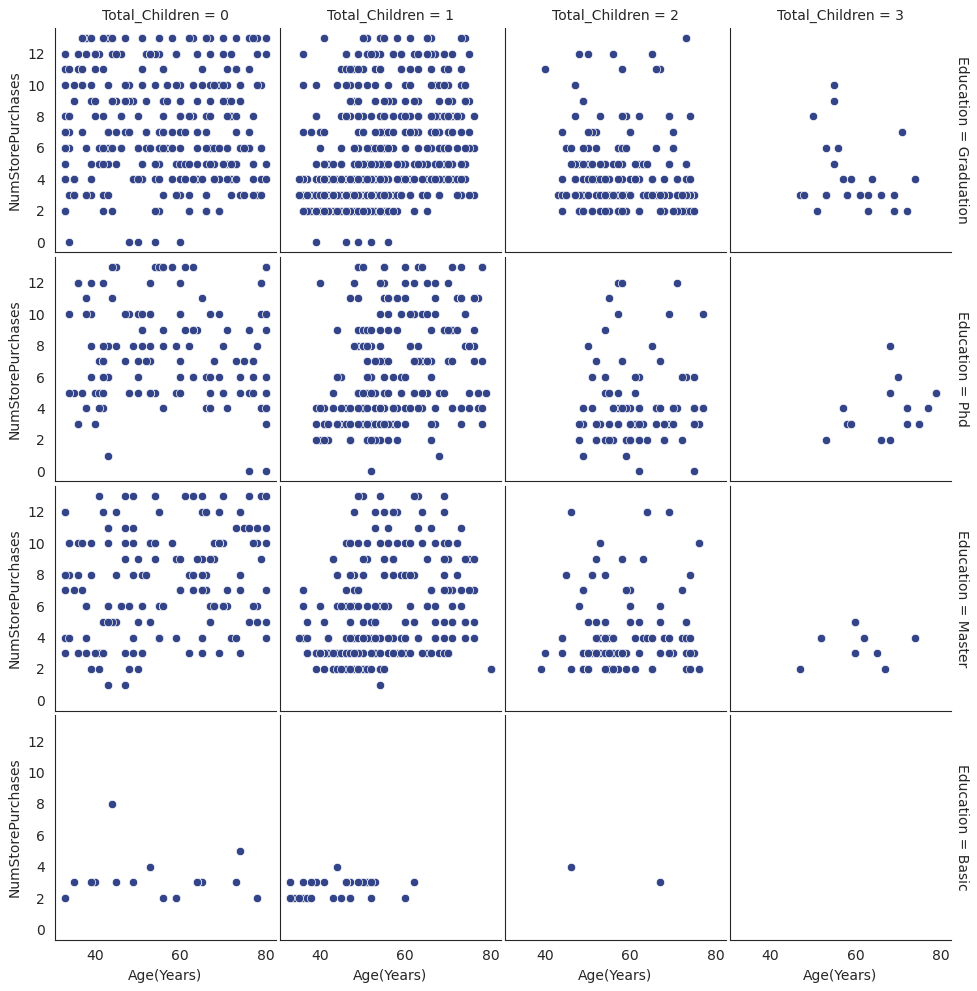

In [49]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df, row="Education", col="Total_Children", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "Age", "NumStorePurchases", color="#334488")
g.set_axis_labels("Age(Years)", "NumStorePurchases")
g.figure.subplots_adjust(wspace=.02, hspace=.02)

In [50]:
from scipy.stats import ttest_ind
group1 = df[df['Total_Children'] > 0]['NumWebPurchases']
group0 = df[df['Total_Children'] == 0]['NumWebPurchases']
t_stat, p_val = ttest_ind(group1, group0)
print(f"T-stat: {t_stat:.2f}, p-value: {p_val:.9f}")


T-stat: -3.32, p-value: 0.000900178


A p-value of 0.0009 (less than 0.05) indicates strong evidence against the null hypothesis, suggesting that there is a significant difference in the number of web purchases between customers with and without children.
Since the p-value is much smaller than the typical significance threshold of 0.05, we can conclude that customers with children make significantly fewer web purchases compared to those without children (as indicated by the negative t-statistic).

## C. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

Channel wise purchases:
 NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumDealsPurchases       5208
dtype: int64


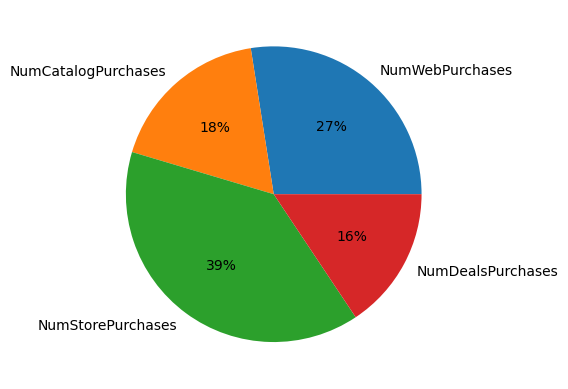

In [51]:
cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']
data = df[cols].sum()
print("Channel wise purchases:\n", data)
plt.pie(data,labels=cols ,autopct='%.0f%%')
plt.show()

The In-Store purchases are higher than any other channel but their combined purchases are higher than the Store.

## D. Does the United States significantly outperform the rest of the world in total purchase volumes?

In [52]:
df[['Total_Purchases','Country']].groupby(['Country']).sum()

,Total_Purchases
Country,
AUS,1952
CA,3457
GER,1530
IND,1734
ME,52
SA,4302
SP,13583
US,1473


In [56]:
us_total = df[df['Country'] == 'US']['Total_Purchases'].sum()
non_us = df[df['Country'] != 'US']['Total_Purchases'].sum()

print(f"US Total purchases: {us_total}")
print(f"Others Total purchases: {non_us}")

US Total purchases: 1473
Others Total purchases: 26610


In [57]:
us_group = df[df['Country'] == 'US']['Total_Purchases']
non_us_group = df[df['Country'] != 'US']['Total_Purchases']
t_stat, p_val = ttest_ind(us_group, non_us_group)
print(f"US vs Others: {us_total:.1f} vs {non_us:.1f}, p-value: {p_val:.4f}")


US vs Others: 1473.0 vs 26610.0, p-value: 0.1469


The P-value is greater than 0.05 , This means that the difference between the US and non-US groups is not statistically significant at the 5% significance level. In other words, there is no strong evidence to reject the null hypothesis that the means of the two groups are equal.

## A. Identify the top-performing products and those with the lowest revenue.

MntFruits            58917
MntSweetProducts     60621
MntFishProducts      84057
MntGoldProds         98609
MntMeatProducts     373968
MntWines            680816
dtype: int64


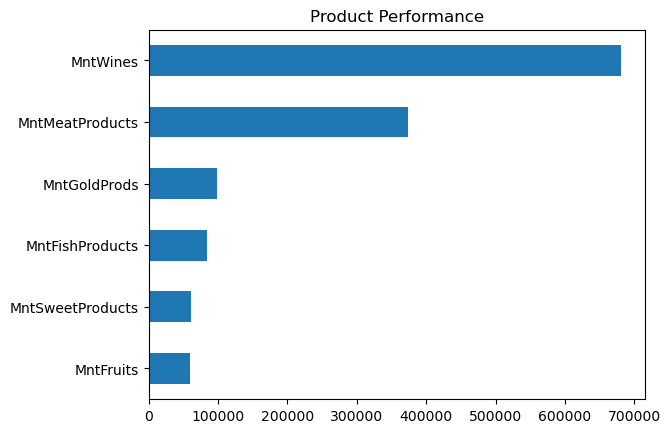

In [ ]:
product_cols = [col for col in df.columns if 'Mnt' in col]
product_totals = df[product_cols].sum().sort_values()
product_totals.plot(kind='barh', title='Product Performance')
print(product_totals)

## B. Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

<Axes: xlabel='Age', ylabel='Response'>

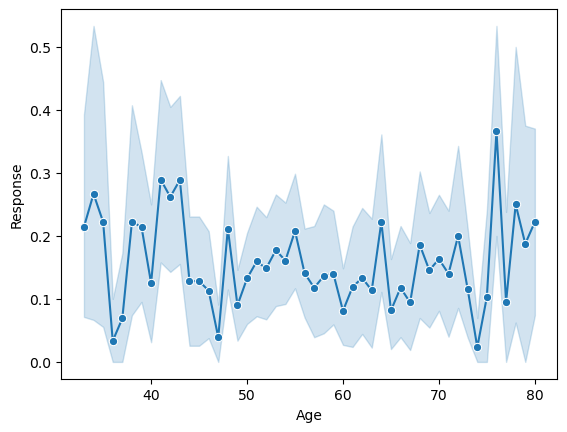

In [ ]:
# The Last Campaign acceptance vs Age
sns.lineplot(df, x= 'Age',y="Response", marker='o')

In [ ]:
df[['Age', 'Response']].corr()

,Age,Response
Age,1.000000,-0.019249
Response,-0.019249,1.000000


In [ ]:
df[['Age', 'Response']].groupby(['Response']).describe()

Age                                                    
           count       mean        std   min   25%   50%   75%   max
Response                                                            
0         1906.0  56.226128  11.553948  33.0  48.0  55.0  66.0  80.0
1          334.0  55.595808  12.290824  33.0  46.0  54.0  66.0  80.0

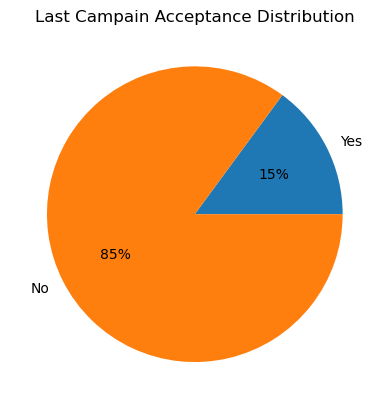

In [ ]:
acceptance_pct = (334/2240)*100
no_acceptance_pct = (1906/2240)*100
plt.pie([acceptance_pct, no_acceptance_pct], labels=['Yes', 'No'],autopct='%.0f%%')
plt.title('Last Campain Acceptance Distribution')
plt.show()

**Analysis Summary:**
1. Only 15% of customers accepted the last campaign.
2. Although these customers come from all age groups, their average age is lower than that of those who did not accept the campaign.
3. There is a negative correlation, indicating that younger individuals are more likely to have accepted the last campaign.

## C. Determine the country with the highest number of customers who accepted the last campaign.

In [ ]:
country_res_df = df.groupby('Country')['Response'].sum().reset_index()
print(country_res_df)

highest_by_country = country_res_df.iloc[country_res_df['Response'].idxmax()]
print(f'\nThe Country with highest number of customer who have accepted the last campaign is {highest_by_country['Country']} \
with {highest_by_country['Response']}')

  Country  Response
0     AUS        23
1      CA        38
2     GER        17
3     IND        13
4      ME         2
5      SA        52
6      SP       176
7      US        13

The Country with highest number of customer who have accepted the last campaign is SP with 176


## D. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

In [ ]:
df.groupby('Total_Children')['Total_Spending'].describe()

,count,mean,std,min,25%,50%,75%,max
Total_Children,,,,,,,,
0,638.0,1099.979624,633.915384,13.0,634.5,1189.5,1594.75,2126.0
1,1128.0,472.690603,477.770414,13.0,63.0,305.0,805.00,2126.0
2,421.0,245.995249,311.292429,13.0,45.0,93.0,316.00,1750.0
3,53.0,274.849057,414.117709,13.0,35.0,88.0,348.00,1616.0


<Axes: title={'center': 'Total Spending by no. of Children'}, xlabel='Total_Children'>

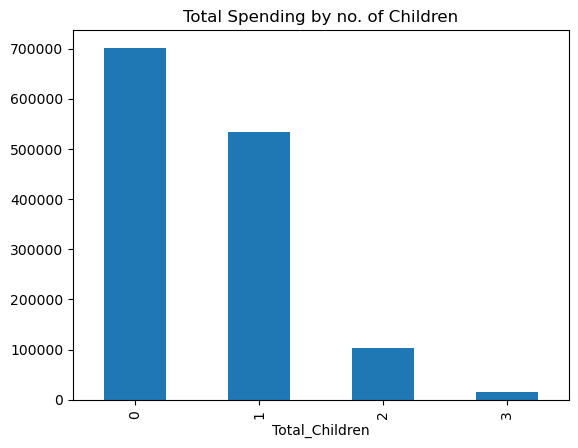

In [ ]:
df.groupby('Total_Children')['Total_Spending'].sum().plot(kind='bar', title='Total Spending by no. of Children')

In [ ]:
group1 = df[df['Total_Children'] > 0]['Total_Spending']
group0 = df[df['Total_Children'] == 0]['Total_Spending']
print(f"Total Spending by Customer with no child: {group0.sum()}")
print(f"Total Spending by Customer with child at home: {group1.sum()}")

Total Spending by Customer with no child: 701787
Total Spending by Customer with child at home: 651326


Hence we can say the customer without children are spending more.


## E. Analyze the educational background of customers who lodged complaints in the last two years.

In [ ]:
complain_df = df[df['Complain'] == 1]['Education'].value_counts()
complain_df

Education
Graduation    14
Master         6
Phd            1
Name: count, dtype: int64

<Axes: title={'center': 'Complaints by Education Level'}, ylabel='count'>

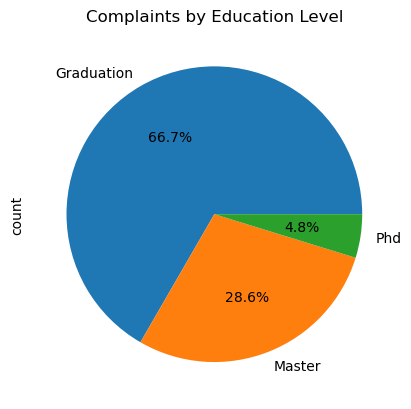

In [ ]:
complain_df.plot(
    kind='pie', autopct='%1.1f%%', 
    title='Complaints by Education Level')
